# Python ML Classification Cheat Sheet


This document has been prepared by the amazing work and support of the Accenture Team and the Etisalat AI Generation Team
    
    The documented was created with as little use of hard-coding as possible so that you can take any part of the code and apply it on your own projects. Kindly improve on any points where hardcoding is used.

    Kindly expand on any unclear points and add any improvements you have!
    
         ( Add your Names :) )
     Kris, Anna-Marie, Abdulrahman, Aisha, Hend, Alyazia, Hessa, Abdulaziz 

# Telecom Churn Model

In this notebook we are going to build a predictive classification model for prediction customer churn using Telecom data.

Data Science Cycle:

Data Understanding
    0. Exploratory Data Analysis

Data Preparation
    1. Target Definition
    2. Feature Engineering
    3. Data Splitting

Modeling
    4. Variable Selection
    5. Model Selection
    6. Fine-tuning

Evaluation
    7. Evaluation & Interpretation


# Libraries

## Basic Libraries to import (Good idea to always start with these)

In [1]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Import the libraries you need from this list

In [2]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Modeling
from boruta import BorutaPy 

from sklearn.feature_selection import RFE, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


# Other Set Up
from datetime import datetime
import os
import warnings
from pprint import pprint

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Styling 

## Styling for graphs

In [43]:
# Set style for displaying data
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set style for plotting
sns.set_style("whitegrid")

# Data Import

## We will use the Telco Churn dataset to predict the target binary value "churn"

### Since the churn is a binary value of either 1 or 0, it is considered classification

## Importing the Telco Churn dataset from a CSV

In [7]:
### get the directory of this notebook
os.path.abspath(os.getcwd())

'C:\\Users\\Abdulaziz\\Desktop\\AI Team\\Coding\\Accenture Workshop\\Churn Use Case'

In [8]:
# Read data and save it in pandas dataframe
data_original = pd.read_csv('Telecom_customer churn.csv') 
#the csv file is in a folder in the same folder as this notebook

# Count rows & columns
print(data_original.shape)

(100000, 100)


## duplicate the panda dataframe

In [9]:
data = data_original.copy() #duplicate the data from by using .copy()

## Top 5 rows

### The description of the columns can be found in a separate excel file

In [10]:
data.head(n=10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.00,0.00,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.10,9.10,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.00,0.00,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.00,0.00,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,82.2750,1312.25,75.000,1.2375,0.00,0.00,0.00,0.0,0.0,156.75,8.1450,52.

In [11]:
data.tail()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,0.0,73.316667,0.0,2.000000,54.666667,45.333333,0.0,0.0,1,25,1,1,U,B,N,3771,9534.0,1594.83,1561.14,9494.0,3751,74.34,452.10,178.62,410,121,73,603.0,159.0,100.0,U,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,15.0,S,M,5.0,M,4.0,2.0,NaN,A,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,53.333333,0.000000,0.000000,0.000000,0.000000,9.000000,0.333333,100.760000,0.000000,21.413333,6.666667,14.893333,0.000000,0.000000,60.333333,0.000000,121.790000,0.000000,1.000000,0.0,0.383333,0.0,4.000000,69.333333,53.333333,0.0,0.0,0,27,1,1,U,CY,Y,3675,8887.0,1517.10,1451.85,8805.0,3629,72.59,440.25,181.45,382,126,73,410.0,143.0,69.0,S,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,9.0,S,M,3.0,M,7.0,2.0,I,A,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,31,1,1,U,DA,N,1271,9336.0,1114.91,1055.93,9234.0,1238,55.58,486.00,65.16,662,85,61,712.0,88.0,72.0,U,SOUTHWEST AREA,Y,N,199.98999,2.0,2.0,WCMB,0.0,0.0,NaN,NaN,NaN,B,1.0,M,9.0,NaN,NaN,NaN,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.666667,0.0,0.666667,0.0,117.333333,0.0,550.666667,0.333333,327.000000,0.0,417.000000,0.333333,1.333333,1.333333,0.106667,235.333333,1.000000,564.233333,1.656667,330.890000,55.000000,62.896667,16.666667,32.883333,442.333333,0.333333,641.230000,1.656667,167.333333,0.0,253.893333,0.0,19.333333,551.000000,417.333333,0.0,0.0,0,25,1,1,U,EA,N,10082,20784.0,2669.20,2593.26,20488.0,9921,123.49,975.62,472.43,1031,450,148,943.0,433.0,165.0,U,SOUTHWEST AREA,Y,N,149.98999,7.0,5.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,S,U,U,U,U,U,N,75.0,1099999
99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.666667,0.0,0.666667,0.0,19.333333,0.0,155.666667,0.000000,1.333333,0.0,130.000000,0.000000,0.666667,0.666667,0.183333,1.333333,3.666667,164.436667,0.000000,0.000000,4.666667,7.110000,0.000000,0.000000,99.000000,0.000000,133.690000,0.000000,32.333333,0.0,30.746667,0.0,6.333333,155.666667,130.000000,0.0,0.0,1,25,1,1,U,B,N,1303,2355.0,956.47,885.94,2225.0,1231,46.63,117.11,64.79,105,60,51,111.0,64.0,51.0,S,LOS ANGELES AREA,Y,N,149.98999,3.0,2.0,WCMB,0.0,0.0,NaN,2.0,S,A,2.0,M,4.0,NaN,NaN,A,0.0,H,U,U,U,U,U,N,5.0,1100000


In [12]:
data.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev',
      

## Looking at dataset metrics such as row count, mean, Median(50%), etc

In [13]:
data_desc = data.describe()
data_desc.style.background_gradient()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643,99643,99643,99643,99643,99643,99643,99643,99643,99109,99109,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,97161,97161,97161,99153,99999,99999,98268,98268,69810,76981,74564,50634,98268,99999,100000
mean,58.72,513.56,46.1791,0.888828,41.0722,13.5596,13.2951,0.261318,1.2864,-13.9338,-1.02107,5.95508,0.04052,4.02292,0.0257767,27.7849,0.02981,144.882,0.870548,55.0852,0.04759,108.893,0.774442,1.79084,4.66688,3.68333,29.7665,0.28472,227.764,1.84404,111.655,24.7533,28.4679,7.89436,18.193,88.4803,0.358162,174.081,0.707832,66.0035,0.416283,165.281,1.1358,10.0443,145.752,109.667,0.0117,1.78293,0.49562,18.834,1.54814,1.35896,2877.14,7648.36,1031.92,960.112,7546.31,2836.37,57.9138,483.726,173.555,519.641,180.337,59.1933,509.635,178.365,58.6836,101.876,1.78712,1.54583,0.18882,0.0825803,6.17724,2.53033,5.78311,1.56756,0.0579741,391.932,1.05e+06
std,46.2917,525.168,23.6235,2.17762,97.2962,30.5009,30.0561,3.12653,14.7114,276.088,50.3632,8.95471,0.877136,10.6722,1.49025,38.3587,0.49697,158.268,9.0539,86.8412,2.12742,118.58,8.12984,5.31557,12.762,10.54,55.8338,1.0921,264.404,23.7332,162.691,34.4148,48.9629,16.1456,41.4215,103.066,4.06563,207.674,8.41015,91.4569,4.65263,237.333,17.7687,15.4184,159.348,119.594,0.54747,5.35395,0.499983,9.65579,1.07526,0.655555,3790.86,8666.56,852.908,840.171,8594.89,3756.51,36.1613,438.485,167.825,533.634,192.726,46.6954,496.663,182.725,40.7586,61.0057,1.31398,0.898395,0.391368,0.275248,4.73527,1.45282,2.18213,0.625456,0.233696,256.482,28867.7
min,-6.1675,0,-26.915,0,0,0,0,0,0,-3875,-1107.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,3.65,2.4,0,0,0.48,0,0,0,0,1,0,0,-2,9.99,1,1,0,0,0,1,1,1,0,-5,1e+06
25%,33.26,150.75,30,0,0,0,0,0,0,-87,-7.365,0.666667,0,0,0,5,0,38.3333,0,5.33333,0,28.6667,0,0,0,0,2.66667,0,49.0508,0,7.65,3,2.37667,0,0,21.6667,0,37.6425,0,10.3333,0,18.5367,0,1.66667,38.3333,28.6667,0,0,0,11,1,1,889,2529,518.98,452.18,2474,868,35.37,176.14,64.09,152,55,33,163,59,34,29.99,1,1,0,0,2,1,4,1,0,212,1.025e+06
50%,48.195,355.5,44.99,0.2475,2.75,1,0.6825,0,0,-6.25,-0.315,3,0,1,0,16,0,100.333,0,26.6667,0,75.6667,0,0,0,0,12.3333,0,146.203,0,50.2,13,11.9767,2,3.21,60.3333,0,115.367,0,34.3333,0,75.8417,0,5.33333,101,76,0,0.333333,0,16,1,1,1822,5191.5,804.53,737.76,5102.5,1789,49.89,360.19,127.5,358,125,48,363,127,50,99.99,1,1,0,0,5,2,6,1,0,342,1.05e+06
75%,70.75,703,59.99,0.99,42,14.4375,14.025,0,0.235,63,1.6425,7.66667,0,3.66667,0,36,0,198.667,0,71.3333,0,149.667,0,1.66667,4,2.87333,35.6667,0.333333,309.478,0,149.453,33,34.1742,8.66667,18.25,118.667,0,233.223,0,86.3333,0,211.195,0,12.3333,199.667,150.667,0,1.33333,1,24,2,2,3492,9776,1263.77,1188.18,9661,3442,69.48,655.67,228.57,711,240,71,698,237,71,149.99,2,2,0,0,9,3,7,2,0,530,1.075e+06
max,3843.26,12206.8,409.99,159.39,4320.75,1102.

# Visualization and Data Exploration

### Usually we want to start our analysis with a correlation heatmap and pairplot. However the number of features is so big it seems inneficcent
    Let's think of other ways we can understand the data better

## Target (Please Expand!!!)

    Let's start by analyising our target 'churn' first

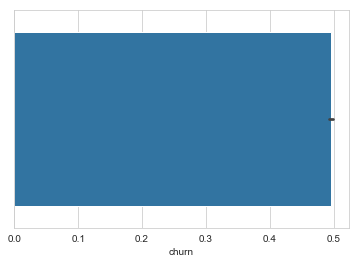

In [14]:
sns.barplot(x=data['churn'],data=data)

## Catagorical Values

In [15]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


    From the above we can see that there are many columns that do not have a numeric value [Catagorical]

In [16]:
# Let's check all non-numeric fields.
data.columns[data.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'], dtype='object')

In [17]:
# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 
                 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 
                 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 
                 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'] 
#We deleted 'crclscod' (please explain why)

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

In [18]:
# Check nominal categorical summaries
data_desc = data[categ_nominal].describe()
data_desc.style.background_gradient()

,new_cell,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,100000,100000,92612,99960,99999,99999,89811,66294,68091,98268,77921,62077,61692,98268,98268,98268,98268,98268,98268,98268
unique,3,2,5,19,4,2,3,2,2,5,2,6,15,17,2,2,2,2,2,2
top,U,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,U,M,C,A,N,U,U,U,U,U,Y
freq,66914,86064,32097,11098,72265,85593,75733,64284,48759,37333,77697,39124,47205,33389,94256,93572,90195,89454,88304,67234


In [19]:
# Check nominal categorical summaries
data[categ_ordinal_ordered].describe()

,crclscod
count,100000
unique,54
top,AA
freq,36509


## Let's analyze catagorical valriables first

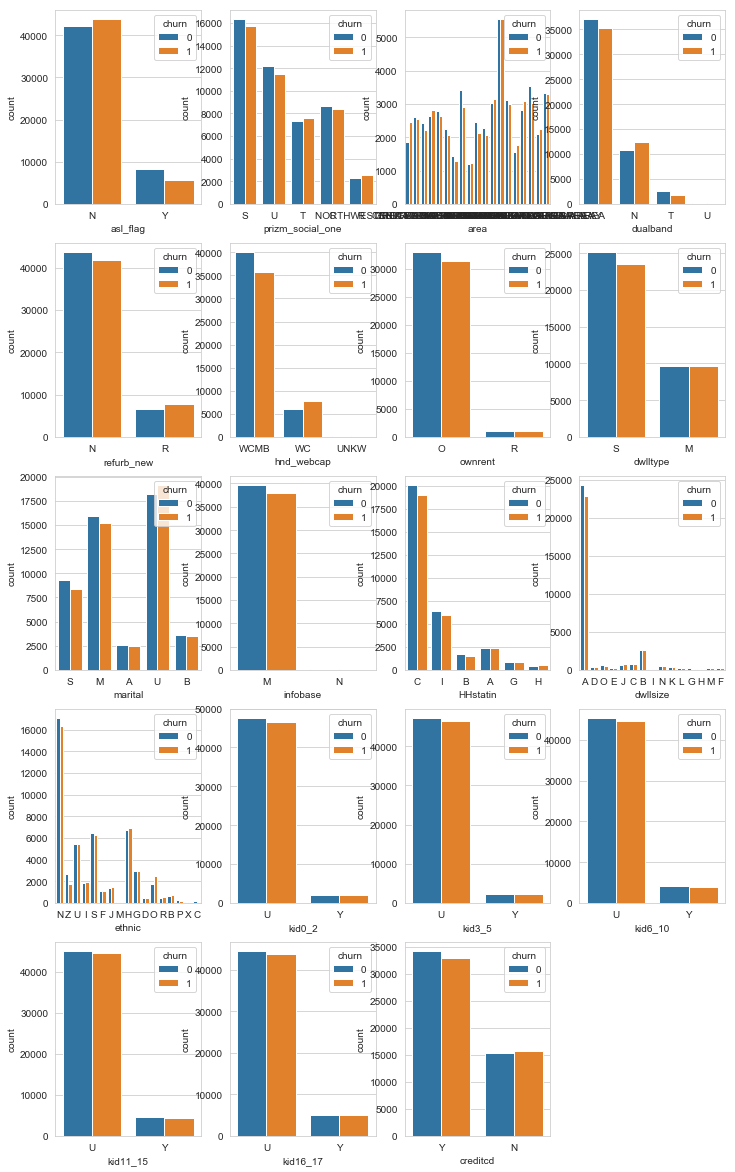

In [20]:
categ_nominal_df = data[categ_nominal] #dataframe with nominal categorical values

plt.figure(figsize=(12,25))
for k in range(1,len(categ_nominal_df.columns)): 
    plt.subplot(6,4,k) #number of graphs to add to this plot
    sns.countplot(x=categ_nominal_df.columns[k], data=data,hue='churn') #We use our target "churn" as hue 

    We can see from the above that 'area' has far too many values and isn't useful in this analysis
    The  'kid*' columns are redundant and don't seem useful for this analysis

In [21]:
categ_nominal_noArea = data[categ_nominal].drop('area',axis=1) #dropping the 'area' column
categ_nominal_noAreaandKids = categ_nominal_noArea[categ_nominal_noArea.columns.drop(
    list(categ_nominal_noArea.filter(regex='kid')))] #dropping all columns with 'kid' in the name

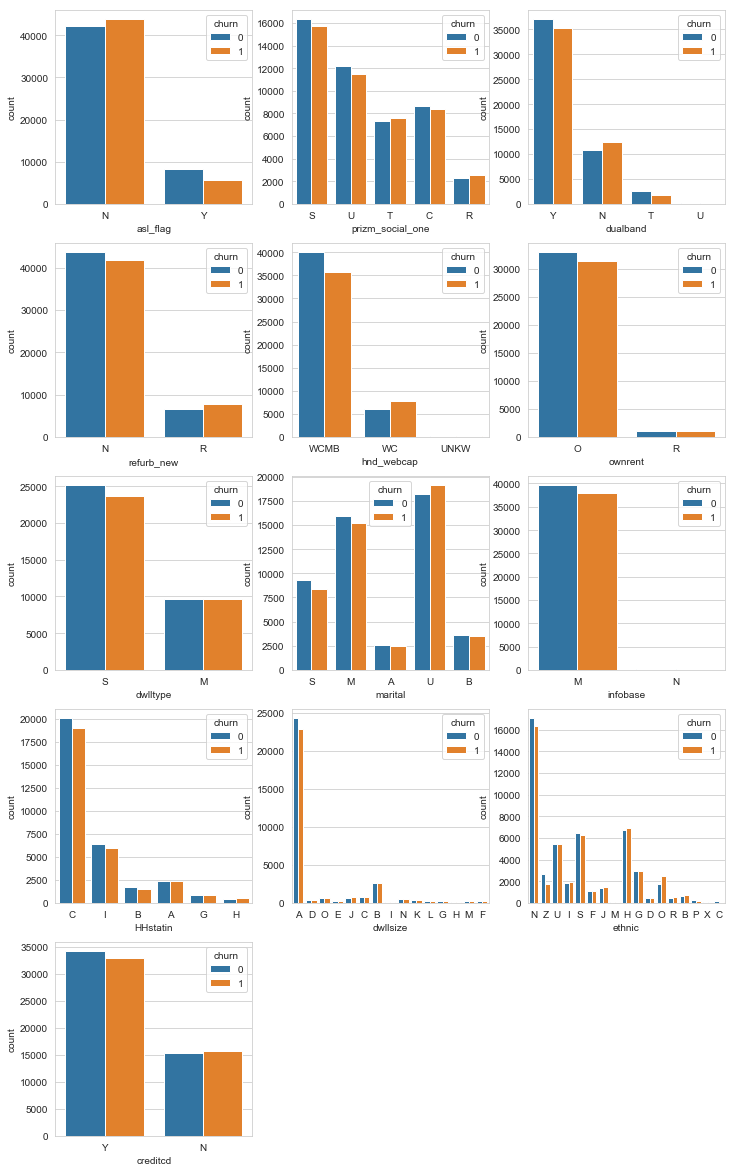

In [22]:
plt.figure(figsize=(12,25))
for k in range(1,len(categ_nominal_noAreaandKids.columns)):
    plt.subplot(6,3,k)
    sns.countplot(x=categ_nominal_noAreaandKids.columns[k], data=data,hue='churn')

    We do not see any strong correlation between the above categorical columns and churn. However, the correlation is not zero so they still provide some value

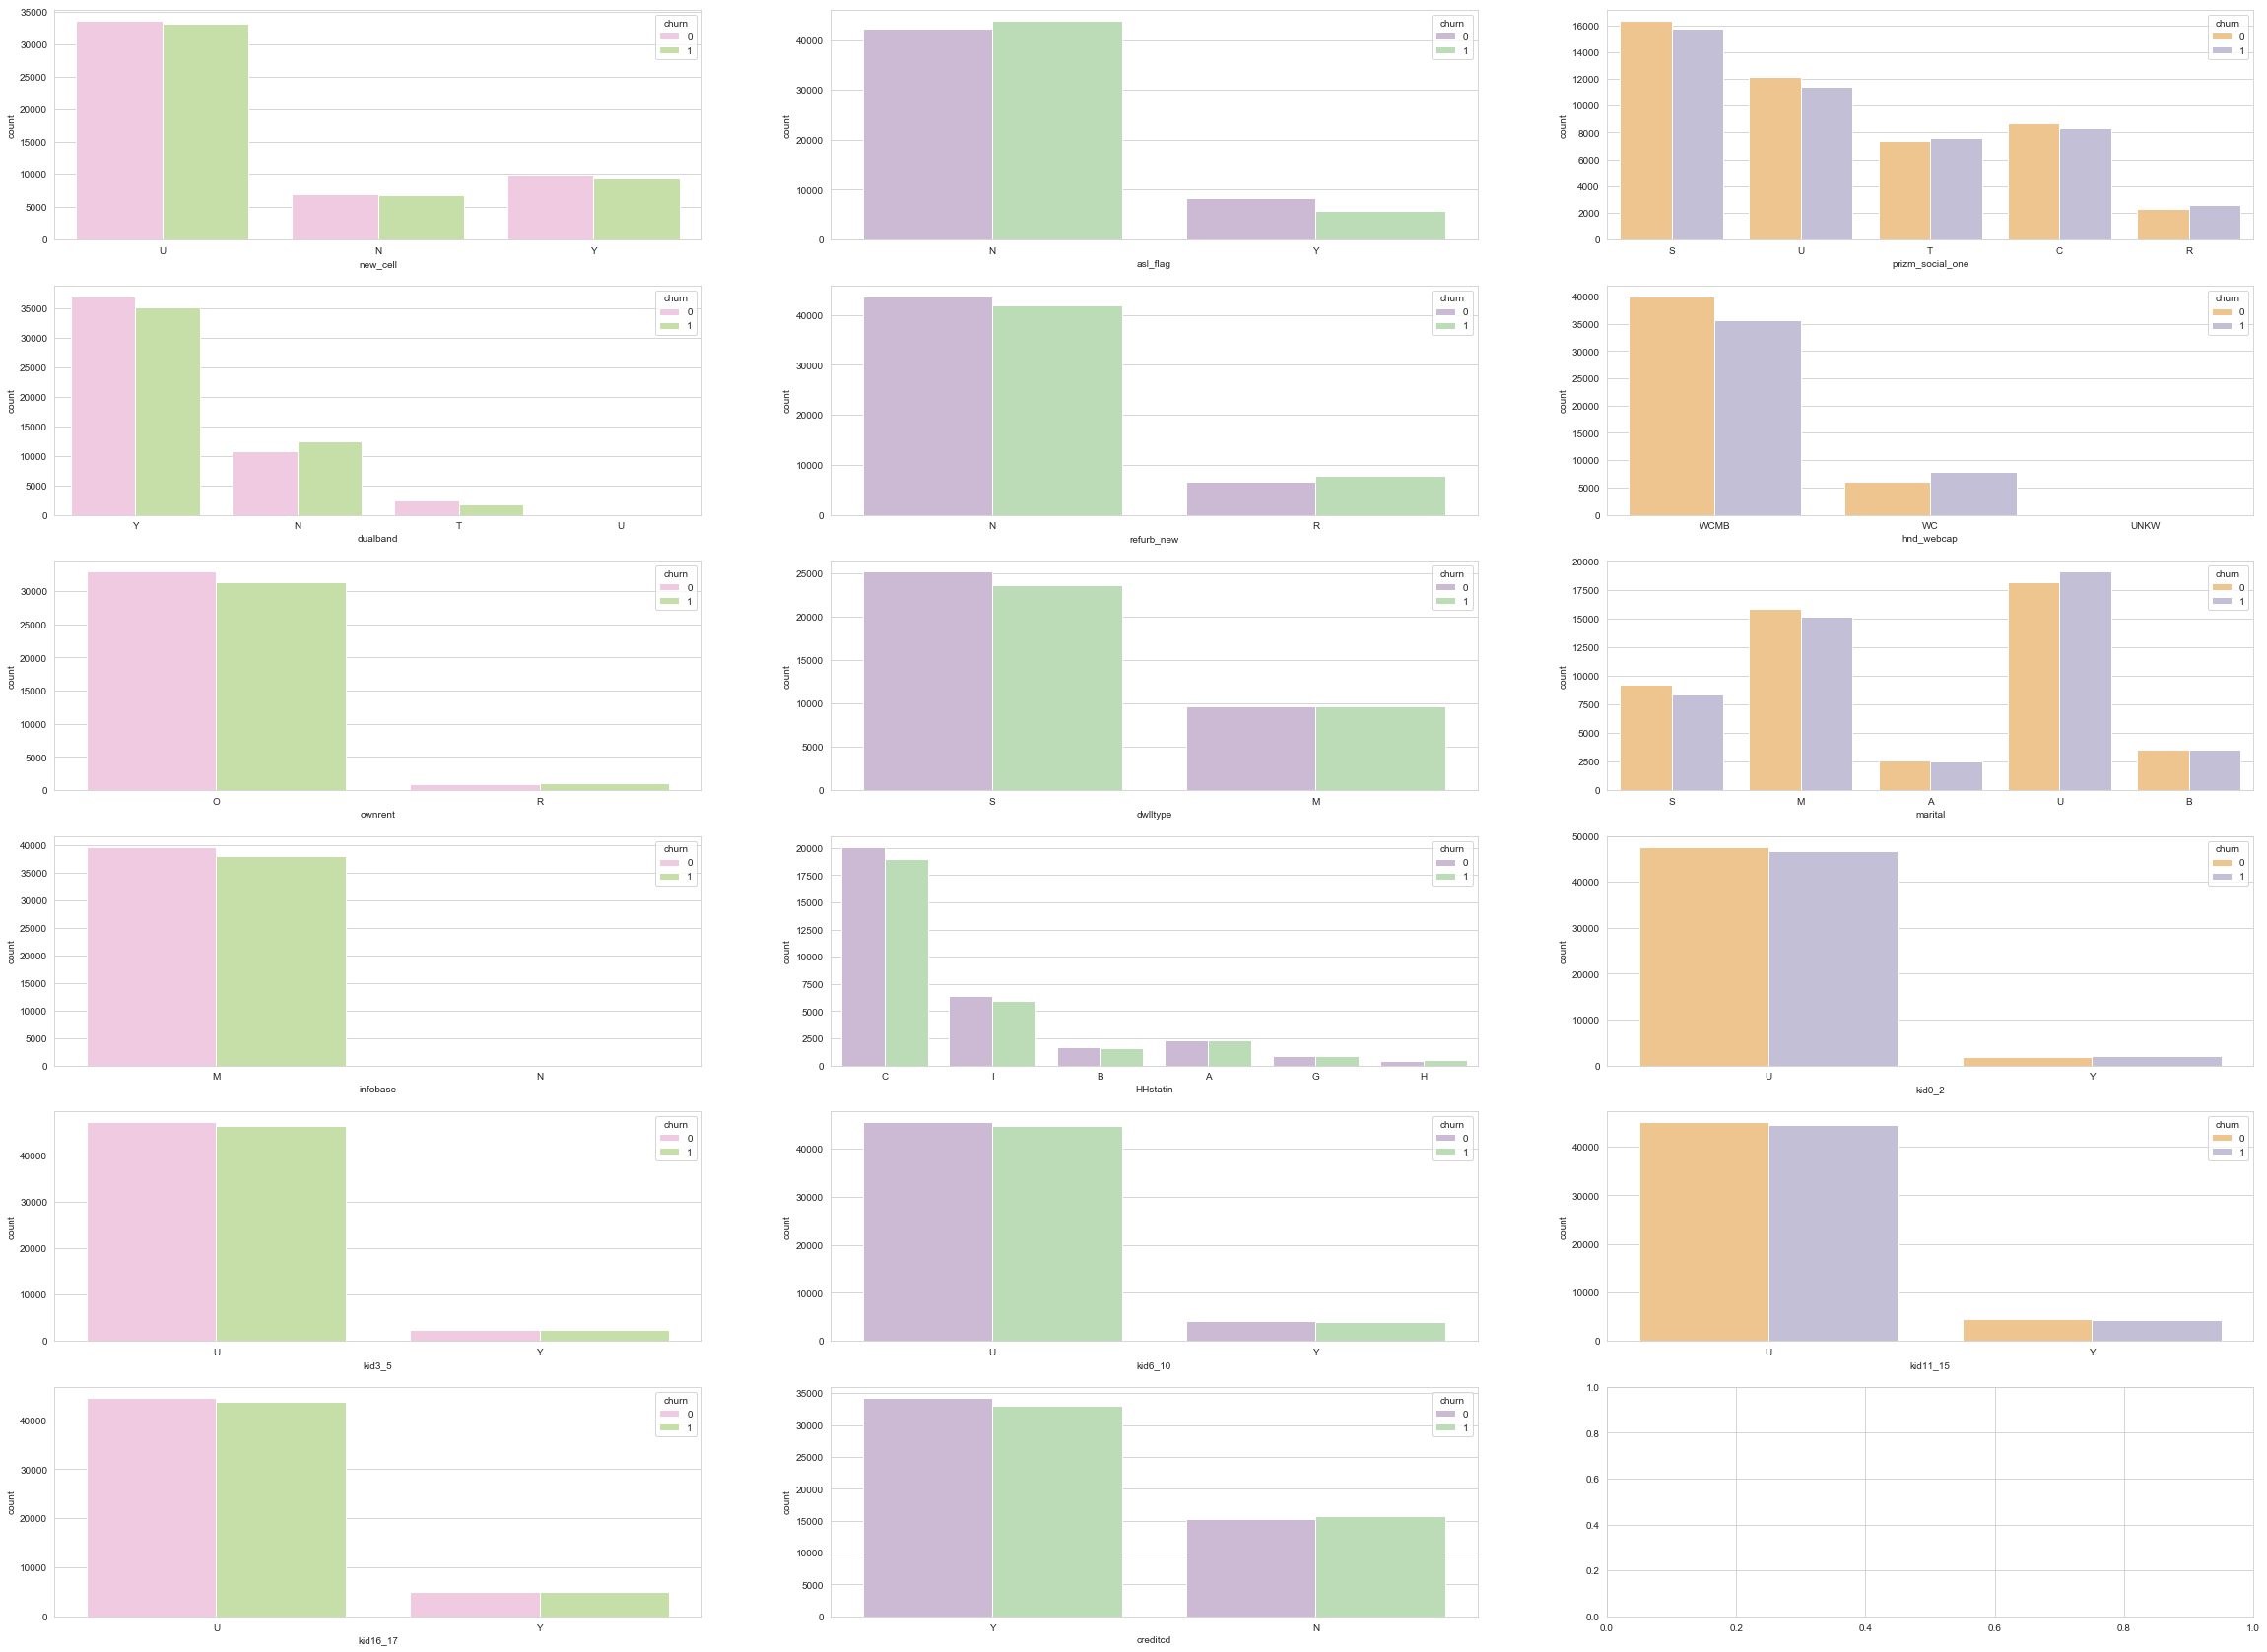

In [23]:
#seaborn
columns = [x for x in categ_nominal if x not in ["area","dwllsize","ethnic"]] #you by no means have to do this you can use .remove or .pop 
# Set pallets
clr = ['PiYG', 'PRGn', 'PuOr'] 
# Create empty subplots
fig,  ax = plt.subplots(ncols=3,figsize=(40,30),nrows=6) 
ax = ax.flatten() # ax is a two dimentional matrix flatten to iterate through x only instead of x & y dimensions 
# Select features to check and loop through
cnt=0
for i, var in enumerate(columns):
    sns.countplot(x=var, hue="churn", data=data,ax=ax[i],palette=clr[cnt]) # draws histogram
    cnt+=1
    if cnt%3==0:
        cnt=0   

## Numeric Values

   ### The number of numeric variables is very big, but we can try to start with variables that we think might be useful using domain knowledge

    Here is a place wehere can get the help of a domain expert

## Set Targets

### Setting feature we want to visualize as x and our target 'churn' as y
    We can change these as many times with multiple variables

In [29]:
x = 'months'
x2 = 'eqpdays'
multiple_x = ['eqpdays','months', 'totcalls','churn']
y = 'churn'

## Find distrebution, mean, median

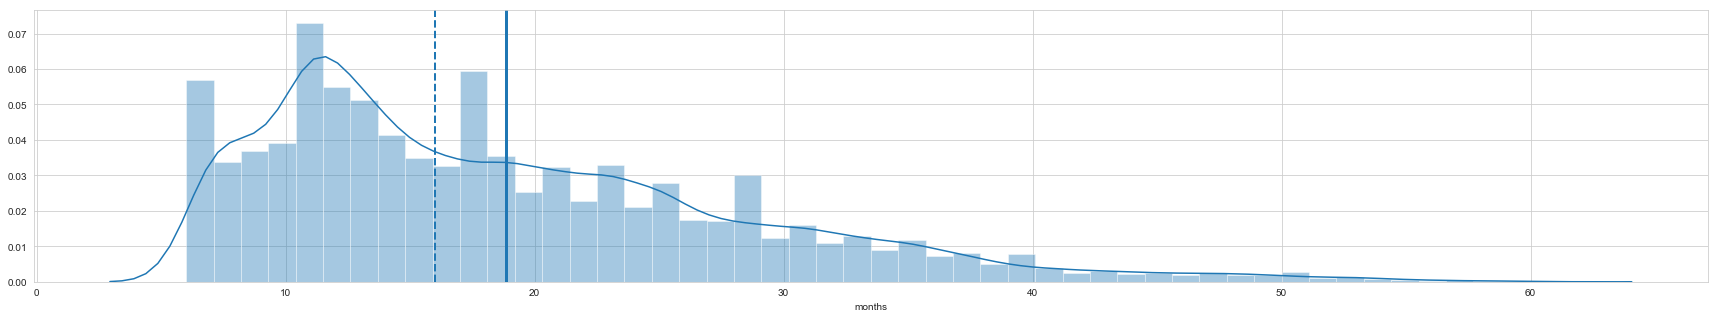

In [25]:
fig,  ax = plt.subplots(ncols=1,figsize=(30,5),nrows=1)

sns.distplot(data[x])
ax.axvline(data[x].mean(), linestyle='solid', linewidth=3)
ax.axvline(data[x].median(),  linestyle='dashed', linewidth=2)

    The above gave us an error because the column has null values. Let's clean them

***Handle Missing Values***

In [26]:
# Replace all other missing values with the median 
data = data.fillna(value=data.median())

    Now run the the distplot code again

### Jointplot

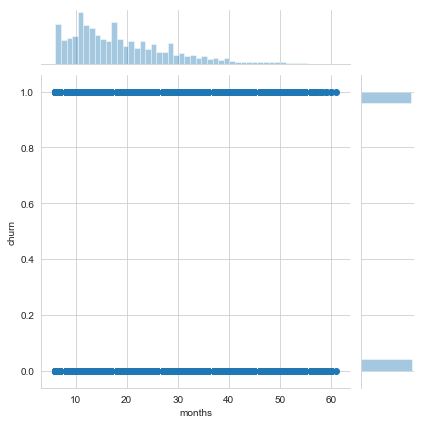

In [33]:
sns.jointplot(data[x],data[y])

## Across multiple variables

### We will use the variable multiple_x

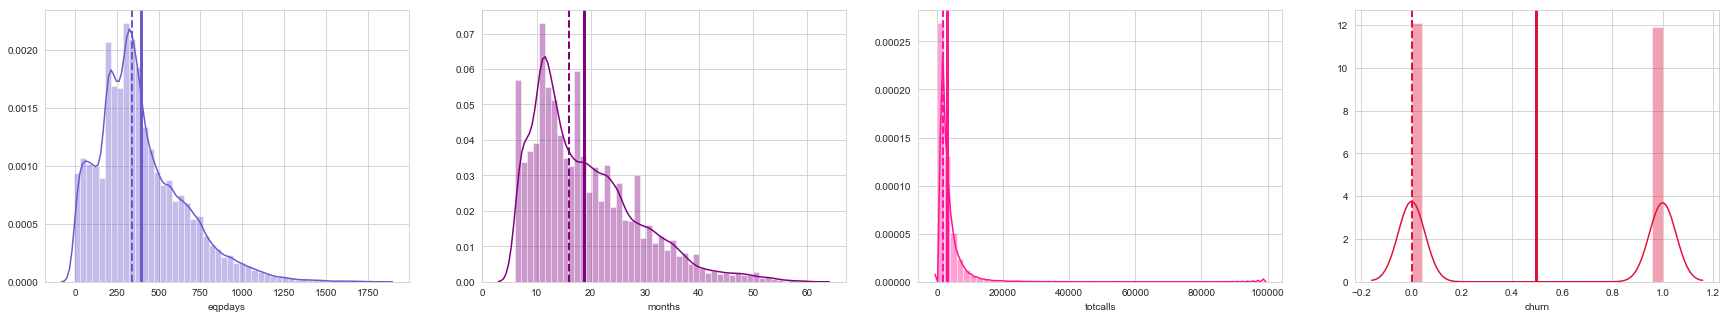

In [34]:
# Set colors
clr = ['slateblue', 'purple', 'deeppink','crimson'] 

## Create plots for Univariate distributions, means, medians

# Create  empty subplots
fig,  ax = plt.subplots(ncols=4,figsize=(30,5),nrows=1)

# Select features to check and loop through
for i, var in enumerate(multiple_x):
    sns.distplot(data[var],  color = clr[i], ax=ax[i])
    ax[i].axvline(data[var].mean(), color=clr[i], linestyle='solid', linewidth=3)
    ax[i].axvline(data[var].median(), color=clr[i], linestyle='dashed', linewidth=2)

    We can see a left skew destribution that we can modify we with log-scaling

#     !!!!Please add log scaling visualization

## Bivariate Analysis (Please Expand!!!)

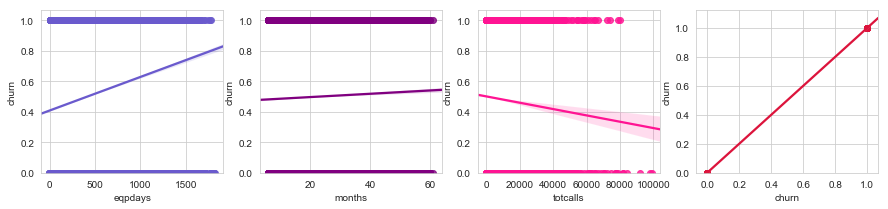

In [35]:
## Create plots for bivariate analayis with select X and Y

# Create empty subplots
fig, ax = plt.subplots(ncols=4,figsize=(15,3))

# Select features to check and loop through
for i, var in enumerate(multiple_x):
    sns.regplot(data[var], data[y], color=clr[i], ax=ax[i])
    ax[i].set(ylim=(0, None))

## Pairplot with hue for target

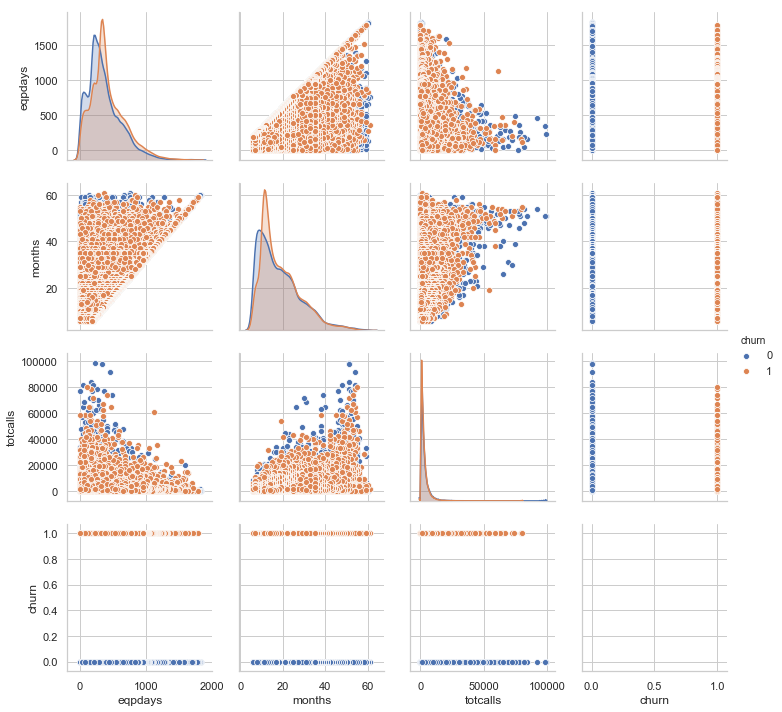

In [44]:
# Generate pairplots for selected features.

sns.pairplot(data[multiple_x], hue =y) #Using our target as the hue

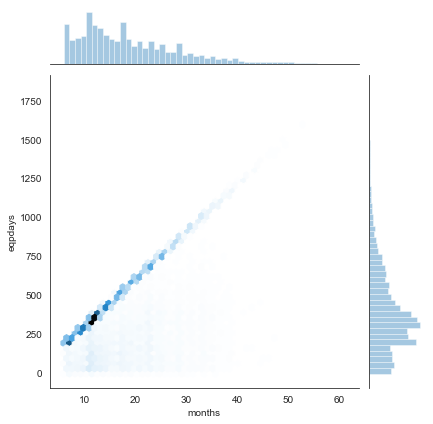

In [38]:
with sns.axes_style("white"):
    sns.jointplot(x=data[x], y=data["eqpdays"], kind="hex") # histogram + shows the distribution of the population

### KDE Plot

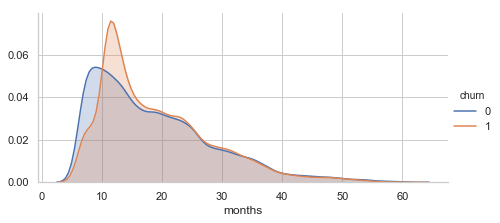

In [45]:
grid = sns.FacetGrid(data, hue=y ,size=3.2, aspect=2)
grid.map(sns.kdeplot, x, shade=True)
grid.add_legend()

In [ ]:
#KDE on multiple columns (Please fix!!!)
# Create empty subplots
sns.set()
grid = sns.FacetGrid(data, hue=y ,size=3.2, aspect=2)
grid.add_legend()

# Select features to check and loop through
for i, var in enumerate(multiple_x):
    grid.map(sns.kdeplot, multiple_x, shade=True)


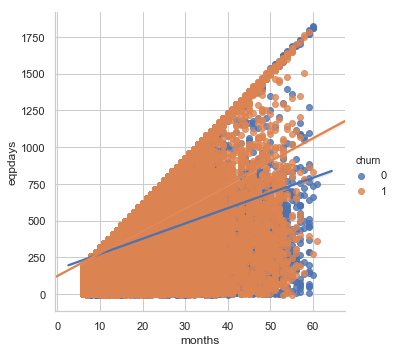

In [46]:
sns.lmplot(x=x, y=x2, hue=y, data=data) # linear regression graph of x and y
#shows relation between x and y with categorical variable in hue

# Data Preparation



### Target Definition
    - Target: Churn behavior: Which customers had a phone plan active in the Independent Period, but became inactive (unsubscribed) in the dependent Period?
    - Subject: NA because anonymous data
    - Granularity: Customers
    - Time Window: Predictors are calculated over a three-month period*, and churn is measured on the fifth.

## Since we modified the "data" dataframe a lot for visualization, let's overwrite it with the original dataset again

In [107]:
data = data_original.copy()

## Feature Engineering

Create new variables, handle categorical data, impute missing values, etc.

### Sampling Data Set (Decrease Size) [Optional]

    We might want to decrease the size of the dataset at the beginning to test things

In [108]:
data = data.sample(frac =.2)

In [109]:
data_desc = data.describe()
data_desc.style.background_gradient()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,19932,19932,19932,19932,19932,19932,19932,19932,19932,19821,19821,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,19449,19449,19449,19830,19999,19999,19650,19650,13927,15313,14861,10158,19650,19999,20000
mean,58.8775,514.086,46.2985,0.899011,41.1047,13.6472,13.3988,0.246728,1.21651,-10.6381,-0.680846,5.9968,0.04385,4.03118,0.0215333,27.9476,0.036,145.385,0.834117,54.6136,0.0391333,109.189,0.732733,1.78948,4.6784,3.69866,29.4212,0.27395,228.393,1.66155,111.524,24.858,28.4649,7.91985,18.2737,88.4854,0.355167,174.45,0.647199,66.0344,0.377567,165.424,1.01436,10.0934,146.219,109.921,0.0141833,1.7539,0.49045,18.822,1.5451,1.35745,2874.66,7657.29,1036.72,964.383,7552.85,2833.06,58.1886,484.77,173.49,518.776,180.134,59.2501,508.971,177.991,58.9018,101.588,1.79024,1.54888,0.19145,0.085598,6.23286,2.55286,5.79571,1.5696,0.0601018,392.924,1.04993e+06
std,44.5167,519.571,23.647,2.04961,93.8773,30.4574,30.119,3.0257,6.64316,262.17,43.5821,9.09206,0.644949,10.8862,0.611173,38.7168,0.794748,158.087,7.86267,83.9512,1.0236,117.831,7.07212,6.86866,13.8933,11.1853,53.6784,0.992895,263.321,18.4864,159.777,34.5389,48.2487,16.0363,40.6845,100.991,3.96091,204.73,6.82777,90.9837,3.82943,236.513,13.6561,15.6491,159,118.674,0.685837,4.9209,0.499921,9.62782,0.885158,0.630079,3714.21,8531.68,852.64,839.112,8451.61,3676,36.4199,438.145,166.907,527.526,190.428,45.5692,490.929,180.503,40.2618,60.9333,1.32534,0.908009,0.393453,0.279777,4.75102,1.4622,2.18221,0.628355,0.237681,255.055,28894.8
min,0,0,-11.29,0,0,0,0,0,0,-3331.25,-768.575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,11.1,9.35,0,0,1.04,0,0,0,0,1,0,0,1,9.99,1,1,0,0,0,1,1,1,0,-5,1.00002e+06
25%,33.4194,152.5,30,0,0,0,0,0,0,-84.75,-7.4475,0.666667,0,0,0,5,0,39.3333,0,5.33333,0,29.3333,0,0,0,0,2.66667,0,50.1242,0,7.80667,3,2.48333,0,0,21.6667,0,38.7708,0,10.6667,0,19.355,0,1.66667,39.3333,29.6667,0,0,0,11,1,1,896,2558.75,521.578,452.397,2510,877,35.42,178.955,64.6325,153,56,33,166,59,35,29.99,1,1,0,0,2,1,4,1,0,212,1.02491e+06
50%,48.68,359.25,44.99,0.2475,2.75,0.975,0.675,0,0,-5.5,-0.315,3,0,1,0,15.6667,0,101,0,26.6667,0,76,0,0,0,0,12.6667,0,147.705,0,50.6617,13.3333,12.3567,2,3.26,61,0,116.59,0,34.3333,0,76.99,0,5.33333,101.667,76.6667,0,0.333333,0,17,1,1,1841.5,5203,809.255,740.49,5114,1807.5,50.29,362.24,127.875,361,125,49,367,127,50,99.99,1,1,0,0,5,2,6,1,0,342,1.04967e+06
75%,71.2069,702.312,59.99,0.99,42.75,14.7,14.35,0,0.28875,64.5,1.73,7.66667,0,3.66667,0,36.3333,0,198.333,0,71,0,149.667,0,1.33333,4,2.6875,35.3333,0.333333,310.562,0,150.437,33,33.9775,9,18.43,118.667,0,234.759,0,86.3333,0,212.647,0,12.6667,199.333,150.333,0,1.33333,1,24,2,2,3488,9784.25,1266.66,1192.33,9683.75,3434.5,69.64,649.765,226.97,707.25,239,71,695,235,71,149.99,2,2,0,0,9,3,7,2,0,534,1.07513e+06
max,983.125,6114.75,313.425,44.3025,2239.25,890.763,890.7

    Here we can check our data to make sure that the sampling didn't change the nature of the dataset too much

### We still have the "data_original" dataframe in case we need to revert any changes

### Tweak/create new variables

    This where we can get help from domain experts to see what kind of new variables we can create with the data we have

In [110]:
# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace kid0-10 columns with preteen 
preteen = data[["kid0_2",
                "kid3_5",
                "kid6_10"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y" or x.iloc[2] == "Y") else "N",axis=1)
data["preteen"] = preteen
data.drop(["kid0_2","kid3_5","kid6_10"], axis=1, inplace=True)

# Replace kid11-17 columns with teen 
teen = data[["kid11_15","kid16_17"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y") else "N",axis=1)
data["teen"] = teen
data.drop(["kid11_15","kid16_17"], axis=1, inplace=True)

In [111]:
data[['preteen','teen']]

,preteen,teen
80065,N,Y
6487,N,N
16022,N,N
75257,N,N
62641,N,N
72946,N,N
56859,N,Y
70494,N,N
9650,N,N
55464,N,N


    The above was created based on our understinding of the data and realizing that the "kid*" columns can be combined

In [112]:
#Create new variables
data["CDR_data"] = data["drop_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_data"] = data["comp_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_voice"] = data["comp_vce_Mean"]/data["plcd_vce_Mean"]
data["CSSR"] = data["complete_Mean"]/data["attempt_Mean"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001512BEE0898>,
      dtype=object)

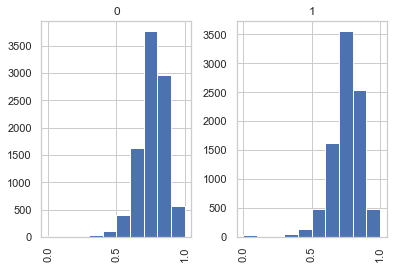

In [113]:
data['CSSR'].hist(by=data.churn) #validating our new variables

    We can run the above exploratory data analysis again on the newly created variables

   #### Note: The above can requested to the data engineering team to preform on the original dataset!

***Handle categorical variables***

In [114]:
# Let's check all non-numeric fields.
data.columns[data.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd', 'preteen', 'teen'], dtype='object')

In [115]:
# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic','preteen','teen','creditcd']

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

In [116]:
# Check nominal categorical summaries
data[categ_nominal].describe()

,new_cell,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,preteen,teen,creditcd
count,20000,20000,18506,19990,19999,19999,17957,13242,13589,19650,15504,12329,12328,19650,20000,20000,19650
unique,3,2,5,19,4,2,3,2,2,5,2,6,15,17,2,2,2
top,U,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,U,M,C,A,N,N,N,Y
freq,13360,17196,6514,2205,14598,17070,15148,12827,9713,7458,15460,7797,9391,6627,17380,17047,13415


In [117]:
# Check nominal categorical summaries
data[categ_ordinal_ordered].describe()

,crclscod
count,20000
unique,50
top,AA
freq,7269


#### One-hot encoding of Catagorical(nominal) values

In [118]:
# Let's one-hot encode all (takes about 1 minute)
for i in categ_nominal:
    data = pd.concat([data,
                      pd.get_dummies(data[i],
                                     prefix=i,
                                     dummy_na=True)],
                     sort=False,
                     axis=1)
    
print(data.shape) 

(20000, 211)


In [119]:
# Remove the categorical variables
data = data.drop(categ_nominal,
                  axis=1)
print(data.shape)

(20000, 194)


In [120]:
# Order ordinal catagorical values as alphabet sort and then assign numbers instead
for i in categ_ordinal_ordered:
    s_a = sorted(data[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    data[i] = data[i].map(s_a_dict)

    We created a lot of dummy variables in the above, let's see what we will do with them later

### Data Cleaning

In [121]:
# Now we have all numerical values, let's check for missing values and rare dummy variables
# We can check missing values under "count" in the descritpive statistics overview
# We will take this in excel 
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,crclscod,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID,CDR_data,CSSR_data,CSSR_voice,CSSR,new_cell_N,new_cell_U,new_cell_Y,new_cell_nan,asl_flag_N,asl_flag_Y,asl_flag_nan,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_nan,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,area_nan,dualband_N,dualband_T,dualband_U,dualband_Y,dualband_nan,refurb_new_N,refurb_new_R,refurb_new_nan,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_nan,ownrent_O,ownrent_R,ownrent_nan,dwlltype_M,dwlltype_S,dwlltype_nan,marital_A,marital_B,marital_M,marital_S,marital_U,marital_nan,infobase_M,infobase_N,infobase_nan,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_nan,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_nan,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,ethnic_nan,preteen_N,preteen_Y,preteen_nan,teen_N,teen_Y,teen_nan,creditcd_N,creditcd_Y,creditcd_nan
count,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19821.000000,19821.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,19449.000000,19449.000000,19449.000000,19830.000000,19999.000000,19999.000000,19650.000000,19650.000000,13927.000000,15313.000000,14861.000000,10158.000000,19650.000000,19999.000000,2.000000e+04,2982.000000,2982.000000,18417.000000,18420.000000,20000.00000,20000.000000,20000.00000,20000.0,20000.000000,20000.000000,20000.0,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000

    We can see from the above that there are missing values by looking at the count row

#### Removing Variables

In [122]:
# Remove all variables based on above analyis (see excel): that have either too many missing values, or are too rare, or is not relevant (e.g. customer id)
toremove = ['new_cell_nan','asl_flag_nan','preteen_nan','teen_nan','Customer_ID','dualband_nan','refurb_new_nan','area_nan','ethnic_X','ethnic_M','dualband_U','infobase_N','hnd_webcap_UNKW','ethnic_C','dwllsize_I','dwllsize_H','dwllsize_G','dwllsize_M','dwllsize_F','ethnic_P','dwllsize_L','dwllsize_E','dwllsize_K','dwllsize_D','ethnic_D','HHstatin_H','dwllsize_N','ethnic_R','dwllsize_O','ethnic_B','dwllsize_J','dwllsize_C','marital_nan','ethnic_nan','creditcd_nan','HHstatin_G','ownrent_R','ethnic_F','area_PHILADELPHIA AREA','area_TENNESSEE AREA','ethnic_J','HHstatin_B','area_SOUTH FLORIDA AREA','ethnic_I','ethnic_O','area_CENTRAL/SOUTH TEXAS AREA','dualband_T','area_NORTHWEST/ROCKY MOUNTAIN AREA','area_HOUSTON AREA','area_NORTH FLORIDA AREA','ethnic_Z','area_OHIO AREA','area_GREAT LAKES AREA','HHstatin_A','prizm_social_one_R','CDR_data','CSSR_data','numbcars','lor','income','adults']

# Remove
data = data.drop(toremove,axis=1)
print(data.shape)

(20000, 133)


#### Replace Missing values with the median

In [123]:
# Replace all other missing values with the median 
data = data.fillna(value=data.median())

    Note: We can replace the missing values with the mean as well

----

# Feature Selection based on Analysis only

In [124]:
selected_features = ['eqpdays','totrev','months']

---------

#### Separating the X and Y

In [125]:
# Set target
target=['churn']

# Set X and Y (features and target)
#x = data[data.columns.difference(target)] #Use this when selecting all features
x= data[selected_features]
y = data[target]

#### Scaling

#### We can apply normalization to the range of 0 and 1 to make our data insensitive to the scale of features. (Feature Engineering step)

## (Please explain normalization more)

In [126]:
# Scale
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Transform back to Dataframe with column names
x = pd.DataFrame(x)
x.columns = list(data[selected_features])

#### Data Split

### Here we will split the data to four parts
    X_train: training columns
    Y_train: target column
    X_test: ...
    y_test: ...

In [127]:
# Split data 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 3)
(4000, 3)
(16000, 1)
(4000, 1)


#### Creating dataframe with column names

In [128]:
# This step is needed so that var selection methods can bring us column names - otherwise, 
# X_Train and Y_train are just numpy arrays, which is efficient for algorithm fitting but not for var selection 
#x_train_df=pd.DataFrame(x_train)
#x_train_df.columns = 
#x_test_df=pd.DataFrame(x_test)
#x_test_df.columns = 

# Feature Selection

Here we selected all features. More advanced feature selection can be done in the "Advanced" section

# Modeling

### Since this is a Classification problem, It's a good idea to start with Logistic Regression

### Here we will fit our features into a Logistic Regression model

In [129]:
 #No need to import again if you already imported it above
from sklearn.linear_model import LogisticRegression

# Raveling y_train (Please explain!!!!)

Note how we will use y_train.values.ravel() below

In [130]:
# Set model: Simple Logistic Regression
LogisticRegression_model = LogisticRegression().fit(x_train,y_train.values.ravel()) #We will fit the training data in the model

#### Visualizing coefficients to understand which columns affect our model the most

# Visualize Coefficients
sns.set_style("whitegrid")
plt.bar(np.arange(LogisticRegression_model.coef_.shape[0]), LogisticRegression_model.coef_)
plt.xticks(np.arange(LogisticRegression_model.coef_.shape[0]), X_train_df.columns, rotation='vertical')
plt.xlim([-1, LogisticRegression_model.coef_.shape[0]])
plt.title("Logistic Regression model coefficients")
plt.show()

# Please fix the above for visualizing Logistic Regression cofficients!!!

## Using the model

In [131]:
#Here we will use ower model by applying it on our test data to predict the price for each house in the test data
preds_test = LogisticRegression_model.predict(x_test)

In [132]:
#The values are saved in this array
preds_test

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [133]:
#We will do the same on the training data
preds_train = LogisticRegression_model.predict(x_train)

In [134]:
preds_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

# Evaluation

## ***Evaluation Metrics***

We will use the following evaluation metrics:
        - AUC
        - Accuracy
        - Precision
        - Recall

In [135]:
# Define Scoring metrics
scoring = ['roc_auc', 'accuracy','precision', 'recall']

In [136]:
# Logistic Regression
LogisticRegression_model = LogisticRegression()

# Score
LogR_scores = cross_validate(LogisticRegression_model, x_train, y_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
LogR_AUC = (LogR_scores['test_roc_auc']).mean().round(3)
LogR_Acc = (LogR_scores['test_accuracy']).mean().round(3)
LogR_Prec = (LogR_scores['test_precision']).mean().round(3)
LogR_Rec = (LogR_scores['test_recall']).mean().round(3)

In [137]:
print("Area Under Curve (AUC): " + str(LogR_AUC))
print("Accuracy: " + str(LogR_Acc))
print("Precision: " + str(LogR_Prec))
print("Recall: " + str(LogR_Rec))

Area Under Curve (AUC): 0.572
Accuracy: 0.541
Precision: 0.542
Recall: 0.401


Add other evalution metrics above!!!

## Confusion Matrix

    The confusion matrix can helps identify... (Please Expand!!!)

In [138]:
from sklearn import metrics

In [139]:
y_pred = preds_test #Create y_pred using predicted results on test data

In [140]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1357,  667],
       [1171,  805]], dtype=int64)

### Let's visualize it

Text(0.5,257.44,'Predicted label')

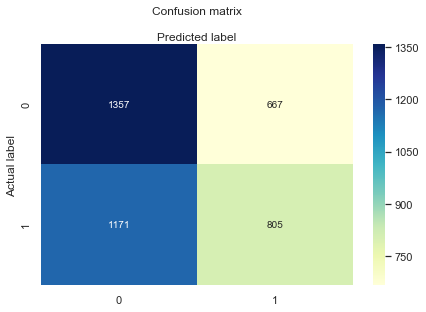

In [141]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## AUC Graph

Kindly fill AUC graph!!!

## Relative Feature Importance

In [142]:
# Visualising feature importance as per the fine tuned RFR fitting result

# Get Feature Importance and sort
col = list(selected_features)
sorted(zip(XGB_RS.feature_importances_,col),reverse=True)

# import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create DataFrame
feature_imp = pd.DataFrame(sorted(zip(XGB_RS.feature_importances_,col)), columns=['Value','Features'])

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Relative Feature Importance')
plt.tight_layout()
plt.show()

NameError: name 'XGB_RS' is not defined

Kindly Fix above feature importance!!!

### If you think this model is good enough, you can save it

In [143]:
import pickle

In [144]:
filename = 'MyLogisticRegressionModel1.sav'
pickle.dump(LogisticRegression_model, open(filename, 'wb'))

### And load it

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

-------

# Kindly fix the below

## Now we can see how our model works

### Let's try it on our training data

In [ ]:
plt.scatter(y_train, preds_train, label="Train")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

#### The model looks good(but can be better!) because the there isn't a big difference between the real price and predicted price for most data points
    For high prices (50) it seems that the predicted price is lower than the real price so that is one area we can improve our model

### Now let's try it on our test data 

In [ ]:
plt.scatter(y_test, preds_test, label="Train")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

#### The model looks good(but can be better!) for our test data too which means that it is not overfitted on the training data

### Now lets viusalize it on our traing and test data

In [ ]:
# It also interesting to take a look how the predicted points relate to real ones.
# All the points should lie on the black dotted line assuming that our model is perfect
plt.scatter(y_train, preds_train, label="Train")
plt.scatter(y_test, preds_test, c="r", label="Test")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()